# Programming Exercise 2: Logistic Regression

## Introduction
In this exercise, you will implement one-vs-all logistic regression and neural networks to recognize handwritten digits. Before starting the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. The assignment can be promptly submitted to the coursera grader directly from this notebook (code and instructions are included below).

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using numpy for all arrays and matrix operations, matplotlib for plotting, and scipy for scientific and numerical computation functions and tools. You can find instructions on how to install required libraries in the README file in the github repository.

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Optimization module in scipy
from scipy import optimize

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading


After completing each part of the assignment, be sure to submit your solutions to the grader. The following is a breakdown of how each part of this exercise is scored.


| Section | Part                                 | Submission function   | Points 
| :-      |:-                                    | :-                    | :-:
| 1       | [Sigmoid Function](#section1)                   | [`sigmoid`](#sigmoid) | 5      
| 2       | [Compute cost for logistic regression](#section2) | [`costFunction`](#costFunction) | 30     
| 3       | [Gradient for logistic regression](#section2)     | [`costFunction`](#costFunction) | 30     
| 4       | [Predict Function](#section4)                     | [`predict`](#predict) | 5      
| 5       | [Compute cost for regularized LR](#section5)      | [`costFunctionReg`](#costFunctionReg) | 15     
| 6       | [Gradient for regularized LR](#section5)          | [`costFunctionReg`](#costFunctionReg) | 15     
|         | Total Points                         | | 100    



You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

<div class="alert alert-block alert-warning">
At the end of each section in this notebook, we have a cell which contains code for submitting the solutions thus far to the grader. Execute the cell to see your score up to the current section. For all your work to be submitted properly, you must execute those cells at least once. They must also be re-executed everytime the submitted function is updated.
</div>


# 1) Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions
decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

The following cell will load the data and corresponding labels:

In [2]:
# Load data
data = np.loadtxt(os.path.join('questions_dataset', 'ex2data1.txt'), delimiter=',')

column_values = ['exam-1' , 'exam-2' , 'labels']
index_values  = [i for i in range(1,len(data)+1)]

df = pd.DataFrame(data,columns=column_values,index=index_values)
df.head()

,exam-1,exam-2,labels
1,34.623660,78.024693,0.0
2,30.286711,43.894998,0.0
3,35.847409,72.902198,0.0
4,60.182599,86.308552,1.0
5,79.032736,75.344376,1.0


In [3]:
X = np.array(df.iloc[:, 0:2]) # first two columns contains the exam scores
y = np.array(df.iloc[:, 2])  # contains labels
m = y.size

## 1.1) Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. We  display the data on a 2-dimensional plot by calling the function `plotData`. You will now complete the code in `plotData` so that it displays a figure where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

To help you get more familiar with plotting, we have left `plotData` empty so you can try to implement it yourself. However, this is an optional (ungraded) exercise. We also provide our implementation below so you can
copy it or refer to it. If you choose to copy our example, make sure you learn
what each of its commands is doing by consulting the `matplotlib` and `numpy` documentation.

```python
# Find Indices of Positive and Negative Examples
pos = y == 1
neg = y == 0

# Plot Examples
pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
```

In [4]:
pos = y == 1 ## +ve samples
neg = y == 0 ## -ve samples

In [5]:
print(pos) ## where y=1, then they are True else false

[False False False  True  True False  True  True  True  True False False
  True  True False  True  True False  True  True False  True False False
  True  True  True False False False  True  True False  True False False
 False  True False False  True False  True False False False  True  True
  True  True  True  True  True False False False  True False  True  True
  True False False False False False  True False  True  True False  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True False  True  True False  True  True False  True  True  True
  True  True  True  True]


In [6]:
## positive samples 1st row
X[pos,0]

array([60.18259939, 79.03273605, 61.10666454, 75.02474557, 76.0987867 ,
       84.43281996, 82.30705337, 69.36458876, 53.97105215, 69.07014406,
       70.66150955, 76.97878373, 89.67677575, 77.92409145, 62.27101367,
       80.19018075, 61.37928945, 85.40451939, 52.04540477, 64.17698887,
       83.90239366, 94.44336777, 77.19303493, 97.77159928, 62.0730638 ,
       91.5649745 , 79.94481794, 99.27252693, 90.54671411, 97.64563396,
       74.24869137, 71.79646206, 75.39561147, 40.45755098, 80.27957401,
       66.74671857, 64.03932042, 72.34649423, 60.45788574, 58.84095622,
       99.8278578 , 47.26426911, 50.4581598 , 88.91389642, 94.83450672,
       67.31925747, 57.23870632, 80.366756  , 68.46852179, 75.47770201,
       78.63542435, 94.09433113, 90.44855097, 74.49269242, 89.84580671,
       83.48916274, 42.26170081, 99.31500881, 55.34001756, 74.775893  ])

In [7]:
## positive samples 2nd row
X[pos,1]

array([86.3085521 , 75.34437644, 96.51142588, 46.55401354, 87.42056972,
       43.53339331, 76.4819633 , 97.71869196, 89.20735014, 52.74046973,
       92.92713789, 47.57596365, 65.79936593, 68.97235999, 69.95445795,
       44.82162893, 72.80788731, 57.05198398, 69.43286012, 80.90806059,
       56.30804622, 65.56892161, 70.4582    , 86.72782233, 96.76882412,
       88.69629255, 74.16311935, 60.999031  , 43.39060181, 68.86157272,
       69.82457123, 78.45356225, 85.75993667, 97.53518549, 92.11606081,
       60.99139403, 78.03168802, 96.22759297, 73.0949981 , 75.85844831,
       72.36925193, 88.475865  , 75.80985953, 69.8037889 , 45.6943068 ,
       66.58935318, 59.51428198, 90.9601479 , 85.5943071 , 90.424539  ,
       96.64742717, 77.15910509, 87.50879176, 84.84513685, 45.35828361,
       48.3802858 , 87.10385094, 68.77540947, 64.93193801, 89.5298129 ])

In [8]:
def plotData(X, y):
    
    # Create New Figure
    fig = plt.figure()
    
    # ====================== YOUR CODE HERE ======================
    pos = y == 1 ## +ve samples
    neg = y == 0 ## -ve samples

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'k*',linewidth=2, markersize=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', markersize=8, mec='k', mew=1)
    # ============================================================

Now, we call the implemented function to display the loaded data:

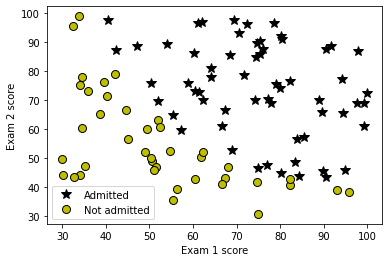

In [9]:
plotData(X, y)

# add axes labels
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

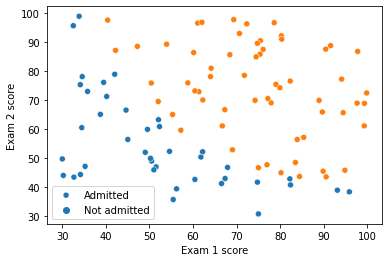

In [10]:
sns.scatterplot(x="exam-1",y="exam-2",hue="labels",data=df)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

plt.show()

<a id="section1"></a>
## 1.2) Implementation

### 1.2.1) Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

Your first step is to implement this function `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**
<a id="sigmoid"></a>

In [11]:
def sigmoid(z):
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================

    g = 1 / ( 1 + np.exp(-z) )

    # =============================================================
    return g

In [12]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


After completing a part of the exercise, you can submit your solutions for grading by first adding the function you modified to the submission object, and then sending your function to Coursera for grading. 

The submission script will prompt you for your login e-mail and submission token. You can obtain a submission token from the web page for the assignment. You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

Execute the following cell to grade your solution to the first part of this exercise.

*You should now submit your solutions.*

# Solution Submission-1

In [13]:
# # appends the implemented function in part 1 to the grader object
# grader[1] = sigmoid

# # send the added functions to coursera grader for getting a grade on this part
# grader.grade()

<a id="section2"></a>
### 1.2.2) Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Before proceeding we add the intercept term to X. 

In [14]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

<img src='figures/img_1.jpg'>

<img src = 'figures/img_2.jpg'>

Now, complete the code for the function `costFunction` to return the cost and gradient. Recall that the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
<a id="costFunction"></a>

In [20]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    h_theta_x = (1 / (1+np.exp(X)))

    # ====================== YOUR CODE HERE ======================
    part_1 = np.dot(y,np.log(h_theta_x))
    part_2 = np.dot( (1-y) , np.log(1-h_theta_x) )
    J      = np.dot(-(1/m), (part_1 + part_2))
                   
    part_1 =  np.dot( (h_theta_x - y), X )
    grad =  np.dot( (1/m), part_1 ) 
    
    # =============================================================
    return J, grad

Once you are done call your `costFunction` using two test cases for  $\theta$ by executing the next cell.

In [21]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

ValueError: operands could not be broadcast together with shapes (100,3) (100,) 